In [78]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv


In [54]:
data = pd.read_csv('../input/weather-dataset-rattle-package/weatherAUS.csv')
df = data.copy()

df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
66862,2016-07-23,MelbourneAirport,6.0,10.6,1.2,3.4,5.9,WNW,67.0,W,...,61.0,70.0,1005.1,1009.2,3.0,7.0,7.6,7.8,Yes,No
32155,2013-09-30,Sydney,12.4,27.4,0.0,6.4,10.6,NNE,35.0,W,...,46.0,35.0,1016.6,1010.7,6.0,3.0,20.3,26.2,No,No
90415,2009-05-25,GoldCoast,16.7,23.8,4.4,NaN,NaN,SSE,50.0,SSE,...,70.0,61.0,1022.7,1020.6,NaN,NaN,20.0,21.5,Yes,No
102529,2017-06-02,MountGambier,0.1,13.6,NaN,NaN,NaN,N,19.0,NE,...,92.0,68.0,1038.3,1035.7,NaN,8.0,6.3,11.4,NaN,No
125163,2012-10-02,SalmonGums,15.6,35.6,0.0,NaN,NaN,N,61.0,N,...,13.0,9.0,NaN,NaN,NaN,NaN,27.0,35.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12431,2009-12-31,Moree,19.8,28.5,12.8,6.0,0.0,NE,35.0,E,...,76.0,58.0,1017.6,1014.4,7.0,7.0,22.2,26.6,Yes,Yes
25820,2013-10-18,Penrith,10.8,24.6,0.0,NaN,NaN,SSW,37.0,SSW,...,27.0,28.0,NaN,NaN,NaN,NaN,17.6,23.9,No,No
87153,2017-05-10,Brisbane,16.2,19.5,0.6,5.0,0.0,W,19.0,S,...,75.0,82.0,1020.6,1018.2,8.0,8.0,17.7,17.5,No,Yes
72615,2015-05-01,Mildura,10.0,23.1,0.0,3.0,8.2,NNE,30.0,ENE,...,72.0,47.0,1024.6,1021.0,0.0,5.0,15.0,22.1,No,No


In [55]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
66862,2016-07-23,MelbourneAirport,6.0,10.6,1.2,3.4,5.9,WNW,67.0,W,...,61.0,70.0,1005.1,1009.2,3.0,7.0,7.6,7.8,Yes,No
32155,2013-09-30,Sydney,12.4,27.4,0.0,6.4,10.6,NNE,35.0,W,...,46.0,35.0,1016.6,1010.7,6.0,3.0,20.3,26.2,No,No
90415,2009-05-25,GoldCoast,16.7,23.8,4.4,NaN,NaN,SSE,50.0,SSE,...,70.0,61.0,1022.7,1020.6,NaN,NaN,20.0,21.5,Yes,No
102529,2017-06-02,MountGambier,0.1,13.6,NaN,NaN,NaN,N,19.0,NE,...,92.0,68.0,1038.3,1035.7,NaN,8.0,6.3,11.4,NaN,No
125163,2012-10-02,SalmonGums,15.6,35.6,0.0,NaN,NaN,N,61.0,N,...,13.0,9.0,NaN,NaN,NaN,NaN,27.0,35.0,No,No


In [56]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,19801.0,12.164275,6.415801,-7.6,7.6,12.0,16.8,30.7
MaxTemp,19850.0,23.145038,7.120880,-3.1,17.9,22.5,28.0,46.4
Rainfall,19557.0,2.437608,8.310256,0.0,0.0,0.0,0.8,175.2
Evaporation,11202.0,5.381494,3.994872,0.0,2.6,4.6,7.4,65.4
Sunshine,10237.0,7.566650,3.790498,0.0,4.8,8.4,10.6,14.0
WindGustSpeed,18536.0,40.024763,13.604609,7.0,31.0,39.0,48.0,120.0
WindSpeed9am,19754.0,14.051180,8.898026,0.0,7.0,13.0,19.0,74.0
WindSpeed3pm,19534.0,18.702058,8.773975,0.0,13.0,19.0,24.0,65.0
Humidity9am,19660.0,69.009766,19.084907,1.0,57.0,70.0,83.0,100.0
Humidity3pm,19355.0,51.586928,20.730793,0.0,37.0,52.0,66.0,100.0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 66862 to 28671
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           20000 non-null  object 
 1   Location       20000 non-null  object 
 2   MinTemp        19801 non-null  float64
 3   MaxTemp        19850 non-null  float64
 4   Rainfall       19557 non-null  float64
 5   Evaporation    11202 non-null  float64
 6   Sunshine       10237 non-null  float64
 7   WindGustDir    18521 non-null  object 
 8   WindGustSpeed  18536 non-null  float64
 9   WindDir9am     18540 non-null  object 
 10  WindDir3pm     19375 non-null  object 
 11  WindSpeed9am   19754 non-null  float64
 12  WindSpeed3pm   19534 non-null  float64
 13  Humidity9am    19660 non-null  float64
 14  Humidity3pm    19355 non-null  float64
 15  Pressure9am    17881 non-null  float64
 16  Pressure3pm    17884 non-null  float64
 17  Cloud9am       12222 non-null  float64
 18  Cl

In [58]:
unique_val = []
for i in df.columns:
    u = df[i].nunique()
    unique_val.append(u)
    
pd.DataFrame({"No. of unique values": unique_val}, index=df.columns)

,No. of unique values
Date,3193
Location,49
MinTemp,357
MaxTemp,452
Rainfall,369
Evaporation,199
Sunshine,141
WindGustDir,16
WindGustSpeed,60
WindDir9am,16


# Missing Values

In [59]:
df.isnull().sum()

Date                0
Location            0
MinTemp           199
MaxTemp           150
Rainfall          443
Evaporation      8798
Sunshine         9763
WindGustDir      1479
WindGustSpeed    1464
WindDir9am       1460
WindDir3pm        625
WindSpeed9am      246
WindSpeed3pm      466
Humidity9am       340
Humidity3pm       645
Pressure9am      2119
Pressure3pm      2116
Cloud9am         7778
Cloud3pm         8246
Temp9am           226
Temp3pm           530
RainToday         443
RainTomorrow      467
dtype: int64

In [60]:
# Features with missing values
miss = df.isnull().sum().sort_values(ascending = False).head(5)
miss_per = (miss/len(df))*100

# Percentage of missing values
pd.DataFrame({'No. missing values': miss, '% of missing data': miss_per.values})

,No. missing values,% of missing data
Sunshine,9763,48.815
Evaporation,8798,43.990
Cloud3pm,8246,41.230
Cloud9am,7778,38.890
Pressure9am,2119,10.595


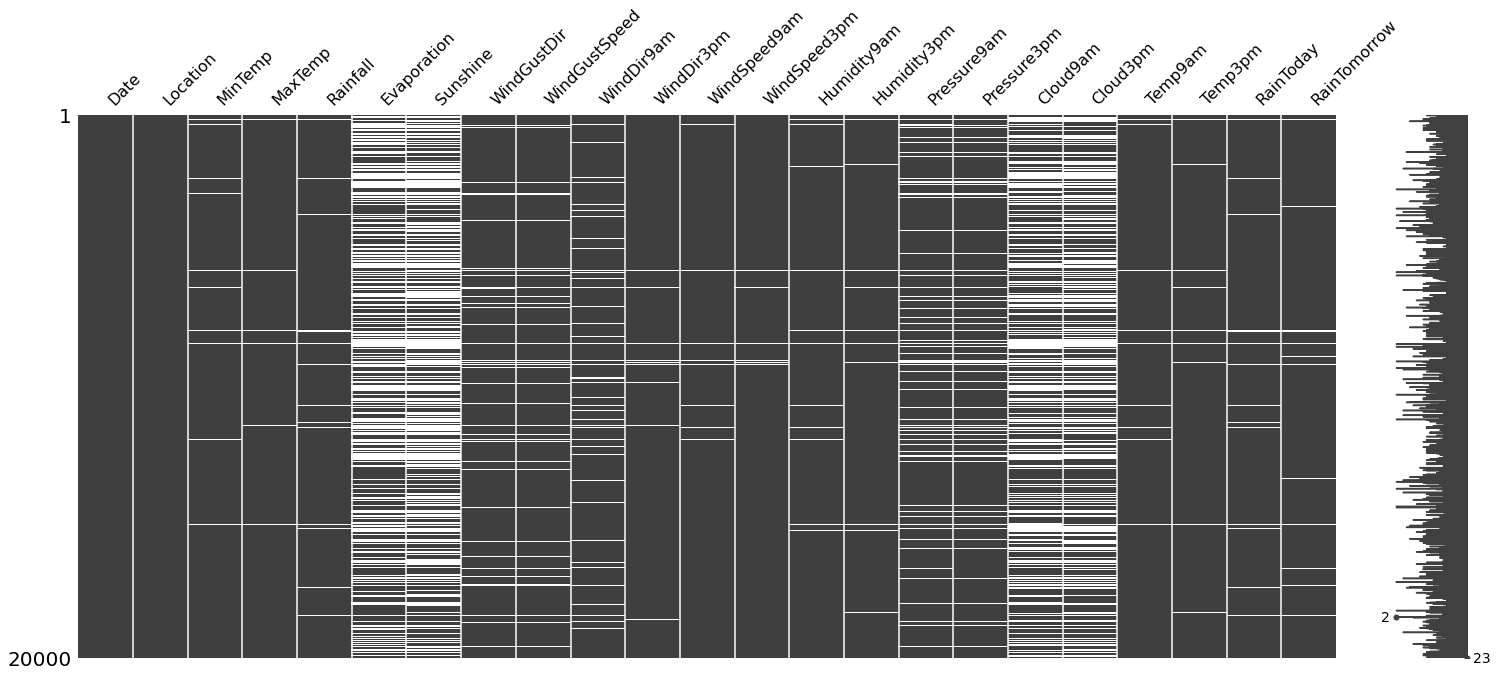

In [61]:
import missingno as msno
msno.matrix(df);

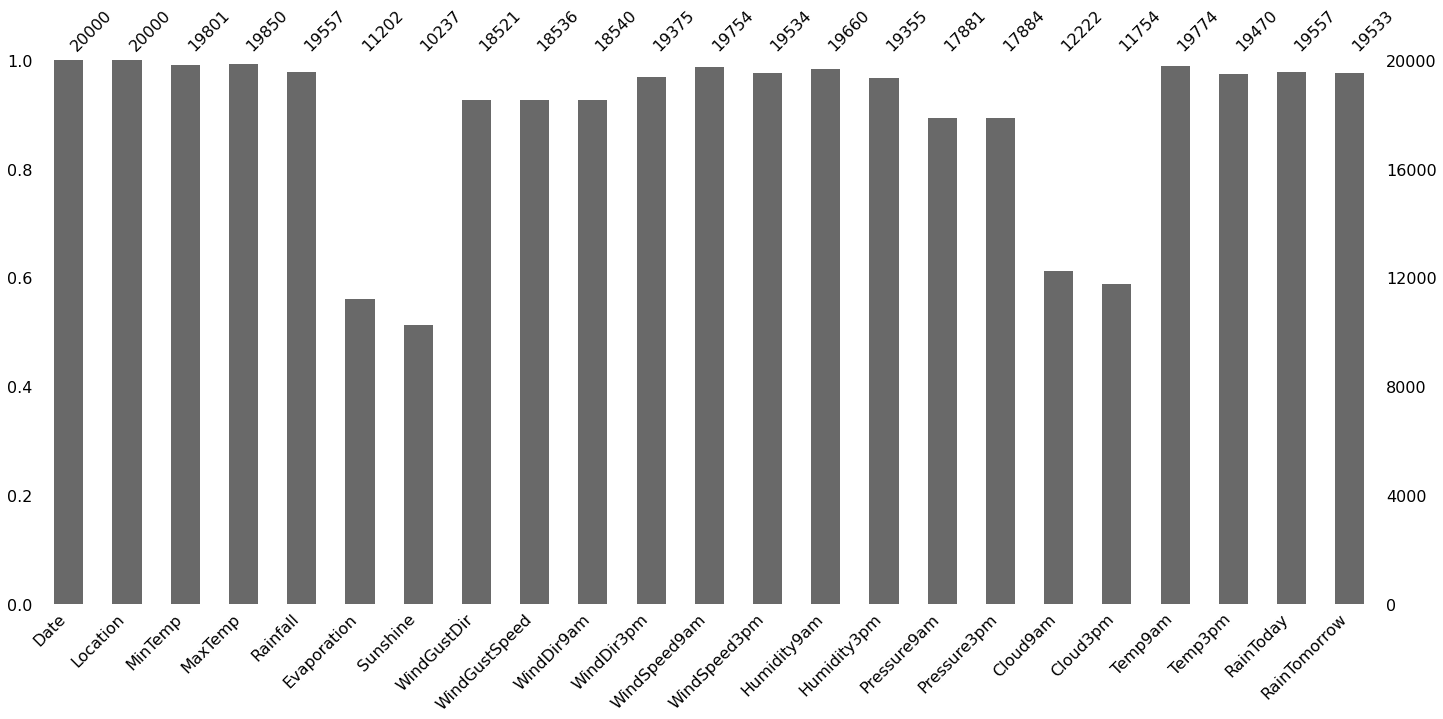

In [62]:
msno.bar(df);

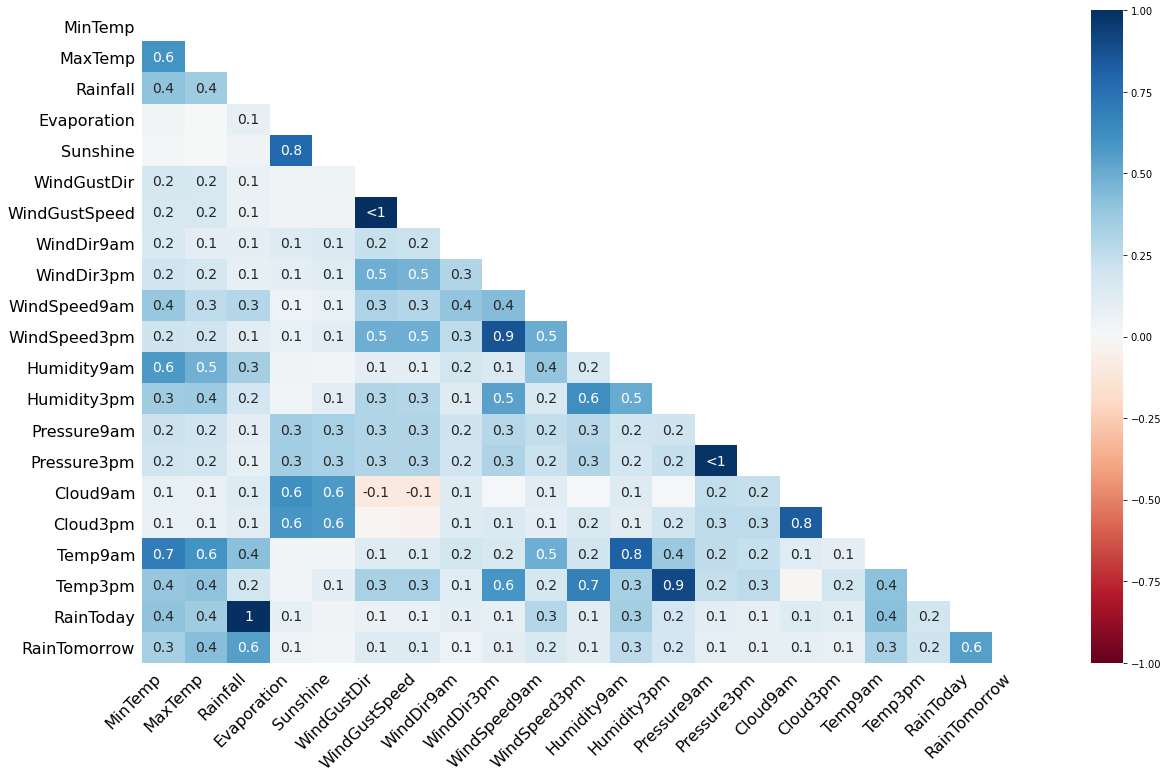

In [63]:
msno.heatmap(df);

In [64]:
df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)
df[['RainToday', 'RainTomorrow']].isnull().sum()

RainToday       0
RainTomorrow    0
dtype: int64

In [65]:
def summary(df, pred=None):
    obs = df.shape[0]
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.min()
    Max = df.max()
    Uniques = df.apply(lambda x: x.unique().shape[0])
    Nulls = df.apply(lambda x: x.isnull().sum())
    print('Data shape:', df.shape)

    if pred is None:
        cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
        str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)

    str.columns = cols
    print('___________________________\nData Types:')
    print(str.Types.value_counts())
    print('___________________________')
    display(str.sort_values(by='Nulls', ascending=False))

summary(df)

Data shape: (19345, 23)
___________________________
Data Types:
float64    16
object      7
Name: Types, dtype: int64
___________________________


,Types,Counts,Uniques,Nulls,Min,Max
Sunshine,float64,10002,142,9343,0.0,14.0
Evaporation,float64,10988,199,8357,0.0,65.4
Cloud3pm,float64,11551,10,7794,0.0,8.0
Cloud9am,float64,12028,10,7317,0.0,8.0
Pressure3pm,float64,17394,451,1951,979.0,1037.2
Pressure9am,float64,17399,452,1946,980.5,1040.4
WindDir9am,object,18014,17,1331,NaN,NaN
WindGustDir,object,18026,17,1319,NaN,NaN
WindGustSpeed,float64,18038,60,1307,7.0,120.0
WindDir3pm,object,18807,17,538,NaN,NaN


In [66]:
df[['RainToday','RainTomorrow']] = df[['RainToday','RainTomorrow']].replace({'Yes':1, 'No':0})

# 2. Multivariate imputation with (a) selected algorithm(s) and label encoding

In [67]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

df_multi_imputation = df.copy()

X = df_multi_imputation.drop(['Date','Location'], axis=1)
X = pd.get_dummies(X, drop_first=True, columns = ['WindDir9am','WindDir3pm','WindGustDir'], 
                   prefix = ['WindDir9am','WindDir3pm','WindGustDir'])
index = X.index
columns = X.columns

imp_mean = IterativeImputer(random_state=0)
imp_mean.fit(X)
X_imputed = imp_mean.transform(X)
df_imputed_bayesian = pd.DataFrame(X_imputed, index=index, columns=columns)
df_imputed_bayesian.isnull().sum()

/opt/conda/lib/python3.7/site-packages/sklearn/impute/_iterative.py:686: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


MinTemp            0
MaxTemp            0
Rainfall           0
Evaporation        0
Sunshine           0
                  ..
WindGustDir_SSW    0
WindGustDir_SW     0
WindGustDir_W      0
WindGustDir_WNW    0
WindGustDir_WSW    0
Length: 63, dtype: int64

In [83]:
# DecisionTreeRegressor

from sklearn.tree import DecisionTreeRegressor

df_multi_imputation = df.copy()

X2 = df_multi_imputation.drop(['Date','Location'], axis=1)
X2 = pd.get_dummies(X2, drop_first=True, columns = ['WindDir9am','WindDir3pm','WindGustDir'], 
                   prefix = ['WindDir9am','WindDir3pm','WindGustDir'])
index = X2.index
columns = X2.columns

imp_mean = IterativeImputer(random_state=0, estimator=DecisionTreeRegressor())
imp_mean.fit(X2)
X_imputed2 = imp_mean.transform(X2)
df_imputed_tree = pd.DataFrame(X_imputed2, index=index, columns=columns)
df_imputed_tree.isnull().sum()

/opt/conda/lib/python3.7/site-packages/sklearn/impute/_iterative.py:686: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.



MinTemp            0
MaxTemp            0
Rainfall           0
Evaporation        0
Sunshine           0
                  ..
WindGustDir_SSW    0
WindGustDir_SW     0
WindGustDir_W      0
WindGustDir_WNW    0
WindGustDir_WSW    0
Length: 63, dtype: int64

In [70]:
summary(df_imputed_bayesian.iloc[:,:60])

Data shape: (19345, 60)
___________________________
Data Types:
float64    60
Name: Types, dtype: int64
___________________________


,Types,Counts,Uniques,Nulls,Min,Max
Cloud3pm,float64,19345,7799,0,0.000000,10.290060
Cloud9am,float64,19345,7322,0,-2.636100,9.482319
WindDir9am_N,float64,19345,2,0,0.000000,1.000000
WindDir9am_NE,float64,19345,2,0,0.000000,1.000000
WindDir9am_NNE,float64,19345,2,0,0.000000,1.000000
WindDir9am_NNW,float64,19345,2,0,0.000000,1.000000
WindDir9am_NW,float64,19345,2,0,0.000000,1.000000
WindDir9am_S,float64,19345,2,0,0.000000,1.000000
WindDir9am_SE,float64,19345,2,0,0.000000,1.000000
WindDir9am_SSE,float64,19345,2,0,0.000000,1.000000


In [71]:
summary(df_imputed_bayesian.iloc[:,60:])

Data shape: (19345, 3)
___________________________
Data Types:
float64    3
Name: Types, dtype: int64
___________________________


,Types,Counts,Uniques,Nulls,Min,Max
WindGustDir_W,float64,19345,2,0,0.0,1.0
WindGustDir_WNW,float64,19345,2,0,0.0,1.0
WindGustDir_WSW,float64,19345,2,0,0.0,1.0


# 3. Outliers

In [72]:
from scipy import stats

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_numeric = df.select_dtypes(include=numerics)

z = np.abs(stats.zscore(df_numeric))
threshold = 3
print('list of outliers:', '\n', np.where(z > 3)[0], '\n', np.where(z > 3)[1])
print('number of outliers:', np.where(z > 3)[0].shape)

list of outliers: 
 [   36    59   115   189   208   337   354   369   507   511   512   520
   607   792   808   852   887   926   950   960   963  1034  1208  1281
  1323  1333  1401  1506  1642  1652  1730  1771  1897  1963  2011  2021
  2045  2106  2215  2279  2322  2413  2414  2539  2622  2812  2831  2896
  2975  2977  2988  3003  3021  3038  3053  3208  3273  3291  3319  3321
  3330  3375  3445  3488  3497  3519  3565  3572  3591  3594  3662  3736
  3747  3829  3837  3846  3848  3858  3894  4087  4098  4149  4257  4315
  4374  4399  4449  4454  4578  4649  4698  4778  4834  4923  4944  4953
  4974  5045  5170  5287  5294  5352  5419  5463  5480  5540  5604  5623
  5645  5721  5752  5789  5807  5833  5863  5970  5973  5978  6011  6025
  6176  6189  6211  6248  6252  6275  6302  6349  6403  6459  6500  6530
  6680  6764  6789  6858  7080  7093  7130  7137  7219  7298  7336  7343
  7484  7498  7574  7583  7589  7595  7715  7758  7759  7787  7792  7909
  7937  8034  8036  8058  8074 

In [75]:
# Example: Price
Q1_maxTemp = df.MaxTemp.quantile(0.25)
Q3_maxTemp = df.MaxTemp.quantile(0.75)
IQR_MaxTemp = Q3_maxTemp - Q1_maxTemp
upper_MaxTemp = Q3_maxTemp + 1.5 * IQR_MaxTemp
lower_MaxTemp = Q1_maxTemp - 1.5 * IQR_MaxTemp
print(f"""
Q1_maxTemp = {Q1_maxTemp}
Q3_maxTemp = {Q3_maxTemp}
IQR_price = {IQR_MaxTemp}
upper_MaxTemp = {upper_MaxTemp}
lower_MaxTemp = {lower_MaxTemp}
""")


Q1_maxTemp = 17.9
Q3_maxTemp = 28.1
IQR_price = 10.200000000000003
upper_MaxTemp = 43.400000000000006
lower_MaxTemp = 2.5999999999999943



In [76]:
df.MaxTemp[df.MaxTemp>upper_MaxTemp].shape

(30,)

In [79]:
fig = px.box(df, y="MaxTemp",)
fig.show()

In [81]:
# IQR values for each variable
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1
pd.concat([Q1, Q3, IQR], axis=1, keys= ['Q1', 'Q3', 'IQR'])

,Q1,Q3,IQR
MinTemp,7.6,16.8,9.2
MaxTemp,17.9,28.1,10.2
Rainfall,0.0,0.8,0.8
Evaporation,2.6,7.4,4.8
Sunshine,4.8,10.6,5.8
WindGustSpeed,31.0,48.0,17.0
WindSpeed9am,7.0,19.0,12.0
WindSpeed3pm,13.0,24.0,11.0
Humidity9am,57.0,83.0,26.0
Humidity3pm,37.0,65.0,28.0


# Isolation Forest

In [84]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split

df_isolation_forest = df_imputed_tree.copy()

y_iso = df_isolation_forest['MaxTemp']
X_iso = df_isolation_forest.drop(['MaxTemp'], axis=1)

clf = IsolationForest(n_estimators=100, max_samples='auto', contamination=0.10, random_state=42)
clf.fit(X_iso)
y_pred = clf.predict(X_iso)

# the model will predict an inlier with a label of +1 and an outlier with a label of -1

outliers_values = X_iso[clf.predict(X_iso) == -1]
outliers_values.shape

(1935, 62)

In [103]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler

df_lof = df_imputed_tree.copy()

scaler = MinMaxScaler()

columns = df_lof.columns

#note that we transform the data with MinMaxScaler
df_lof_scaled = scaler.fit_transform(df_lof)
df_lof_scaled = pd.DataFrame(df_lof, columns=columns)

y = df_lof_scaled['MaxTemp']
X = df_lof_scaled.drop(['MaxTemp'], axis=1)

# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).

y_pred = clf.fit_predict(X)
X_scores = clf.negative_outlier_factor_
np.sort(X_scores)[:100]

array([-2.30073291, -2.17477452, -2.16638588, -2.01792527, -1.97760311,
       -1.95044429, -1.93530309, -1.9312465 , -1.92898444, -1.8335488 ,
       -1.82273791, -1.80448915, -1.79135946, -1.77225627, -1.76959078,
       -1.76246071, -1.75223949, -1.7401358 , -1.72422011, -1.71657502,
       -1.69625038, -1.69459074, -1.6903136 , -1.6899874 , -1.67582836,
       -1.66314122, -1.65697219, -1.65282068, -1.64789438, -1.63167106,
       -1.62631275, -1.61569494, -1.59294549, -1.59141483, -1.58780116,
       -1.58627593, -1.58166584, -1.5806241 , -1.57706176, -1.57291169,
       -1.57131524, -1.56899134, -1.56383966, -1.56203122, -1.55648505,
       -1.55616682, -1.55105112, -1.54468292, -1.54391216, -1.54055943,
       -1.53143448, -1.53051832, -1.5300867 , -1.52874329, -1.52017029,
       -1.51999129, -1.51830988, -1.51820782, -1.51738558, -1.51736286,
       -1.51610248, -1.5146817 , -1.51296597, -1.50867167, -1.50740983,
       -1.50259876, -1.50224676, -1.50168702, -1.49856747, -1.49

In [95]:
threshold = np.sort(X_scores)[1110]
threshold

-1.205447689549342

In [96]:
X[(X_scores > threshold)==False].shape

(1111, 62)

# Handling Ouliers

In [92]:
df_numeric_no = df_numeric[~((df_numeric < (Q1 - 1.5 * IQR)) |(df_numeric > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_numeric.shape)
print(df_numeric_no.shape)

(19345, 18)
(11944, 18)


In [102]:
df_numeric2 = df_numeric.copy()

Q1_maxTemp = df.MaxTemp.quantile(0.25)
Q3_maxTemp = df.MaxTemp.quantile(0.75)
IQR_MaxTemp = Q3_maxTemp - Q1_maxTemp

df_numeric2.MaxTemp[((df_numeric2.MaxTemp < (
    Q1_maxTemp - 1.5 * IQR_MaxTemp)) |(df_numeric2.MaxTemp > (Q3_maxTemp + 1.5 * IQR_MaxTemp)))] = df_numeric2.MaxTemp.mean()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [104]:
fig = px.box(y=df_numeric2.MaxTemp)
fig.show()

In [105]:
# Deleting observations based on the LOF threshold
df_numeric_no2 = df_imputed_tree[(X_scores > threshold)==True]
print(df_imputed_tree.shape)
print(df_numeric_no2.shape)

(19345, 63)
(18234, 63)


In [106]:
# the threshold observation
df_imputed_tree[(X_scores == threshold)]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW
131607,5.1,13.5,0.0,2.4,0.7,57.0,2.0,13.0,78.0,84.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
threshold_row = df_imputed_tree[(X_scores == threshold)]
outliers = df_imputed_tree[(X_scores < threshold)]
# We get rid of the indexes of outliers and transformed them into array
outliers.to_records(index = False)
# We define a variable for outlier array
outliers_array = outliers.to_records(index = False)

# We replace all the outliers with the threshold row
outliers_array[:] = threshold_row.to_records(index = False)

df_numeric_no3 = df_imputed_tree.copy()

# the outlier observations after replacement by the threshold observation
df_numeric_no3[(X_scores < threshold)] = pd.DataFrame(outliers_array, index = df_numeric_no3[(X_scores < threshold)].index)
df_numeric_no3[(X_scores < threshold)].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW
55320,5.1,13.5,0.0,2.4,0.7,57.0,2.0,13.0,78.0,84.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4705,5.1,13.5,0.0,2.4,0.7,57.0,2.0,13.0,78.0,84.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96578,5.1,13.5,0.0,2.4,0.7,57.0,2.0,13.0,78.0,84.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18550,5.1,13.5,0.0,2.4,0.7,57.0,2.0,13.0,78.0,84.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54809,5.1,13.5,0.0,2.4,0.7,57.0,2.0,13.0,78.0,84.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* # Data Transformation

In [108]:
# spliting training and testing data
from sklearn.model_selection import train_test_split

# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

X2_norm = df_imputed_tree.copy()

y = X2_norm['MaxTemp']
X = X2_norm.drop(['MaxTemp'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

index = X_train.index
columns = X_train.columns

df_train_norm = pd.DataFrame(X_train_norm, columns = columns, index = index)
df_train_norm.head()

,MinTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,...,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW
96548,0.672823,0.000000,0.128440,0.878571,0.362832,0.148649,0.307692,0.353535,0.31,0.669449,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
65592,0.503958,0.002747,0.149847,0.907143,0.362832,0.324324,0.307692,0.555556,0.37,0.617696,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
16704,0.432718,0.000000,0.064220,0.885714,0.362832,0.000000,0.430769,0.646465,0.23,0.667780,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60593,0.408971,0.000000,0.122324,0.514286,0.327434,0.324324,0.200000,0.565657,0.28,0.651085,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63101,0.453826,0.000000,0.003058,0.578571,0.327434,0.270270,0.461538,0.818182,0.58,0.799666,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Standardization (Z-score transformation)

In [109]:
from sklearn.preprocessing import StandardScaler

# copy of datasets
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

index = X_train.index
columns = X_train.columns

# fit scaler on training data
scaler = StandardScaler().fit(X_train)

# transform training data
X_train_stand = scaler.transform(X_train)

# transform testing dataabs
X_test_stand = scaler.transform(X_test)

df_train_stand = pd.DataFrame(X_train_stand, columns = columns, index = index)
df_train_stand.head()

,MinTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,...,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW
96548,0.954566,-0.291789,0.781804,1.280827,0.601543,-0.345093,0.153357,-1.723180,-0.988738,0.426798,...,-0.221696,-0.245097,-0.262127,-0.272123,3.860757,-0.259868,-0.255734,-0.267576,-0.250677,-0.257451
65592,-0.041854,-0.243007,1.123543,1.385428,0.601543,1.116192,0.153357,-0.679762,-0.700147,-0.016115,...,-0.221696,-0.245097,-0.262127,3.674808,-0.259017,-0.259868,-0.255734,-0.267576,-0.250677,-0.257451
16704,-0.462219,-0.291789,-0.243411,1.306977,0.601543,-1.581564,1.065657,-0.210224,-1.373528,0.412511,...,-0.221696,-0.245097,-0.262127,-0.272123,-0.259017,-0.259868,-0.255734,-0.267576,-0.250677,-0.257451
60593,-0.602341,-0.291789,0.684165,-0.052829,0.308082,1.116192,-0.644906,-0.627591,-1.133034,0.269636,...,-0.221696,-0.245097,3.814940,-0.272123,-0.259017,-0.259868,-0.255734,-0.267576,-0.250677,-0.257451
63101,-0.337667,-0.291789,-1.219807,0.182522,0.308082,0.666566,1.293732,0.676681,0.309925,1.541223,...,-0.221696,-0.245097,-0.262127,-0.272123,-0.259017,-0.259868,-0.255734,-0.267576,3.989193,-0.257451
